### **Importing Libraries**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### **Downloading Dataset**

In [18]:
import urllib.request
import os

# # dataset lnk
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# destination_folder = "/content"
# os.makedirs(destination_folder, exist_ok=True)

# destination_file = os.path.join(destination_folder, "adult.data")

# urllib.request.urlretrieve(url, destination_file)

# print(f"Dataset downloaded and saved to: {destination_file}")


**Creating Dataframe**

In [61]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

try:
    df = pd.read_csv(
        url,
        header=None,
        names=columns,
        na_values=' ?',
        skipinitialspace=True,
        engine='python'  # More robust engine for parsing
    )

    # Strip whitespace from all string columns
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Strip whitespace from column names
    df.columns = df.columns.str.strip()

    # Verifying
    missing_cols = set(columns) - set(df.columns)
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")

except Exception as e:
    print(f"Error loading data: {e}")
    raise


In [62]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### **Preprocessing**

In [63]:
df = df.dropna()

In [64]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [65]:
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


### **Exploratory Data Analysis**

In [66]:
# features and labels

X = df.drop('income', axis=1)
y = df['income']


In [67]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Age Distribution by Income and Gender**

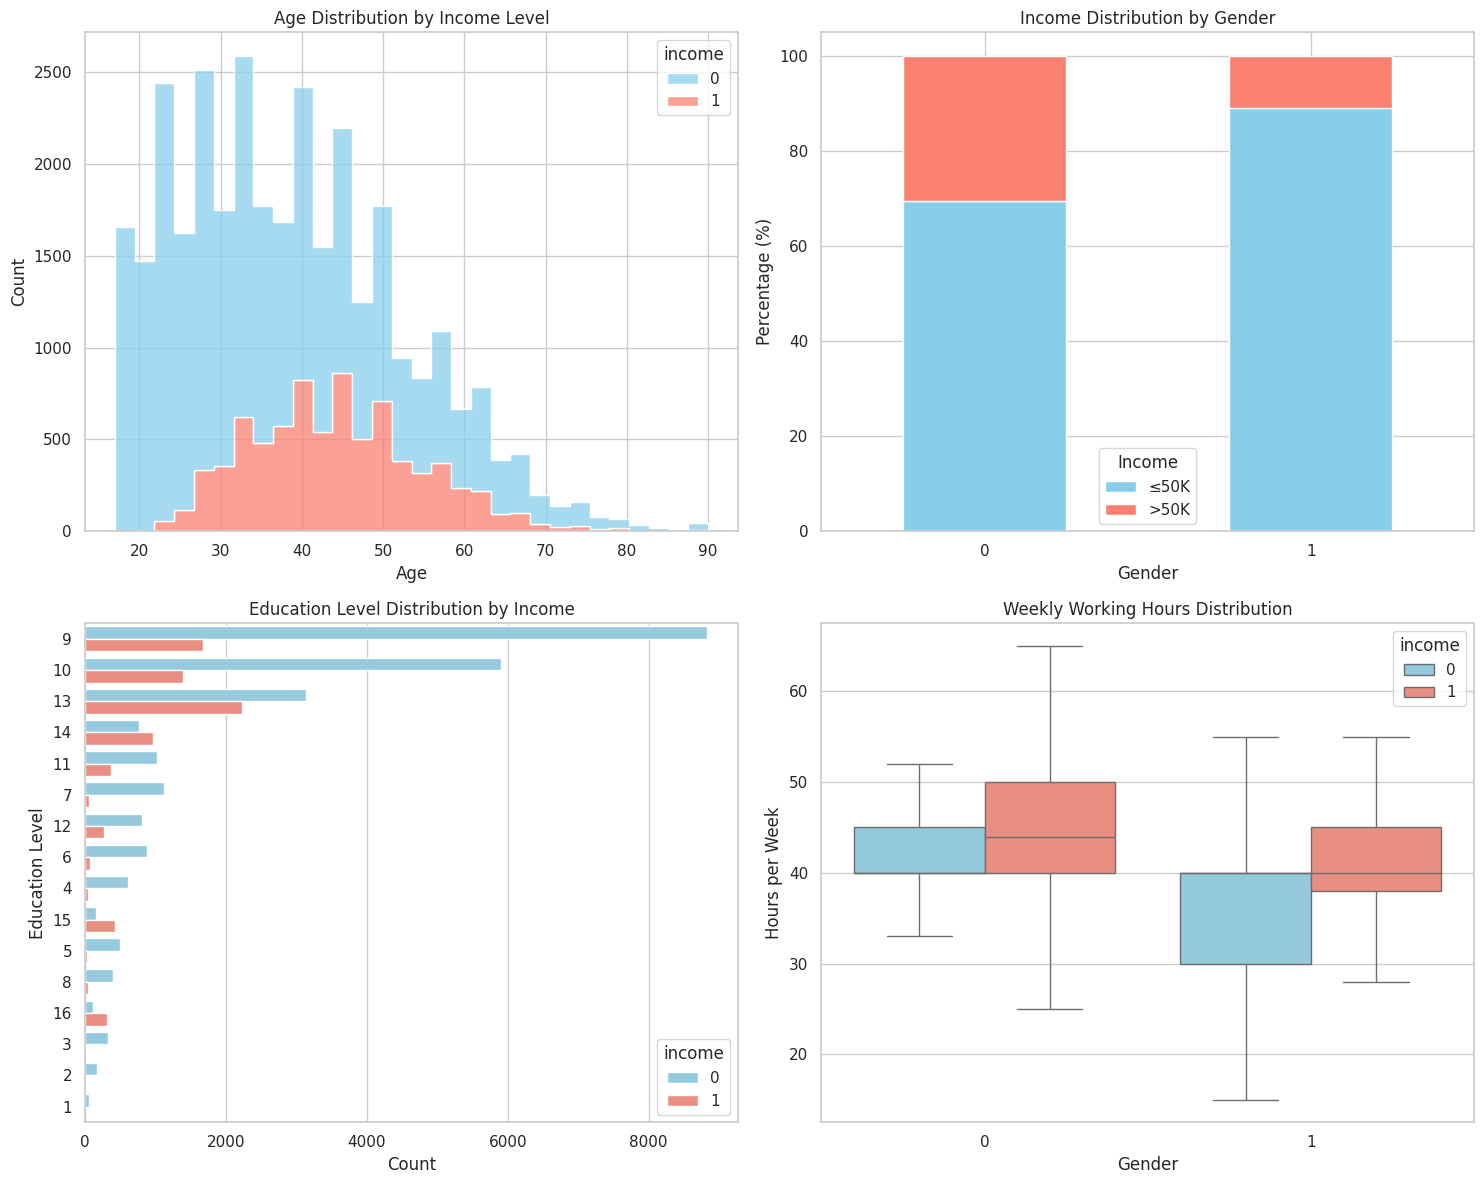

In [69]:

sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# 1. Age Distribution by Income and Gender
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='income', element='step',
             palette={0: 'skyblue', 1: 'salmon'}, bins=30, multiple='stack')
plt.title('Age Distribution by Income Level')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Income Proportion by Gender
plt.subplot(2, 2, 2)
income_gender = pd.crosstab(df['sex'], df['income'], normalize='index') * 100
income_gender.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(['≤50K', '>50K'], title='Income')
plt.xticks(rotation=0)

# 3. Education Level vs Income
plt.subplot(2, 2, 3)
order = df['education-num'].value_counts().index
sns.countplot(data=df, y='education-num', hue='income', order=order,
              palette={0: 'skyblue', 1: 'salmon'})
plt.title('Education Level Distribution by Income')
plt.xlabel('Count')
plt.ylabel('Education Level')

# 4. Weekly Working Hours by Income and Gender
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='sex', y='hours-per-week', hue='income',
           palette={0: 'skyblue', 1: 'salmon'}, showfliers=False)
plt.title('Weekly Working Hours Distribution')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')

plt.tight_layout()
plt.show()


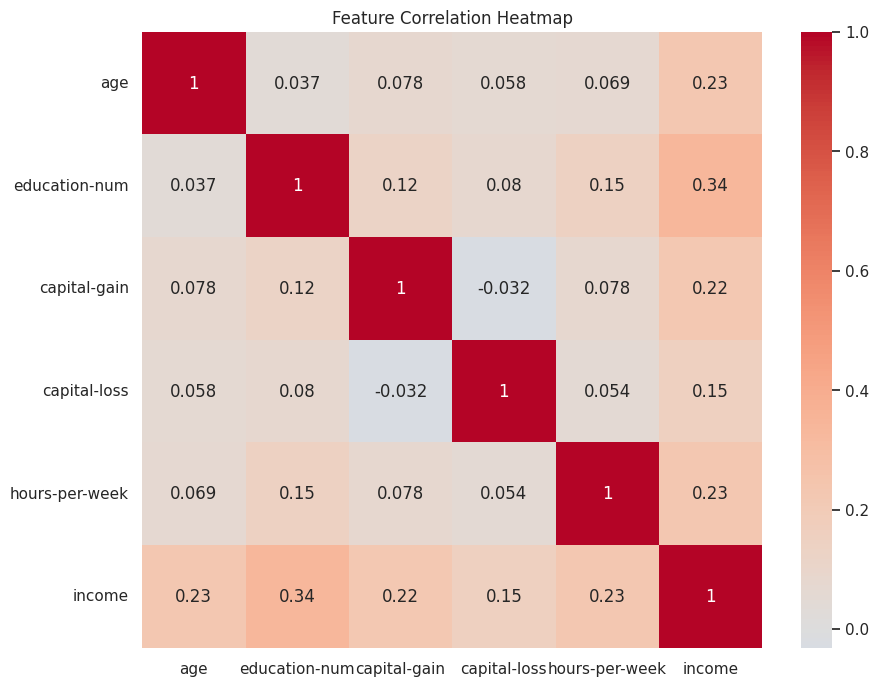

In [70]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['age', 'education-num', 'capital-gain',
                'capital-loss', 'hours-per-week', 'income']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

### **Train-Test Split**

In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [73]:
scaler = StandardScaler()

numeric_features = ['age', 'fnlwgt', 'education-num',
                   'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status',
                       'occupation', 'relationship', 'race', 'native-country']

In [74]:
X_train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
24029,43,Self-emp-not-inc,96129,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,0,60,United-States
8788,18,?,276864,Some-college,10,Never-married,?,Own-child,White,1,0,1602,20,United-States
15564,34,Private,200192,Some-college,10,Never-married,Other-service,Not-in-family,White,1,0,0,40,United-States
9585,17,Private,156736,10th,6,Never-married,Sales,Unmarried,White,1,0,0,12,United-States
7377,41,Private,179580,Some-college,10,Divorced,Other-service,Not-in-family,White,1,0,0,36,United-States
6028,21,Private,149637,Some-college,10,Never-married,Other-service,Not-in-family,White,1,0,0,40,United-States
31614,49,Private,237920,Doctorate,16,Married-civ-spouse,Sales,Husband,White,0,0,0,60,United-States
9311,52,Private,165681,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,40,United-States
16745,33,Private,44392,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,0,0,0,20,United-States
25459,37,Private,179671,9th,5,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,0,50,United-States


In [75]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

### **Random Forest Classifier**

In [77]:
missing_cat = set(categorical_features) - set(df.columns)
if missing_cat:
    print(f"Warning: Missing categorical features: {missing_cat}")
    categorical_features = list(set(categorical_features) - missing_cat)

In [78]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

**Model**

In [79]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))])

**Training**

In [80]:
try:
    model.fit(X_train.drop('sex', axis=1), y_train)
except Exception as e:
    print(f"Error during model training: {e}")
    raise

**Evaluation**

In [81]:
y_pred = model.predict(X_test.drop('sex', axis=1))
print("\nOverall Model Performance:")
print(classification_report(y_test, y_pred))


Overall Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7417
           1       0.74      0.64      0.68      2352

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



<Figure size 1500x1200 with 0 Axes>

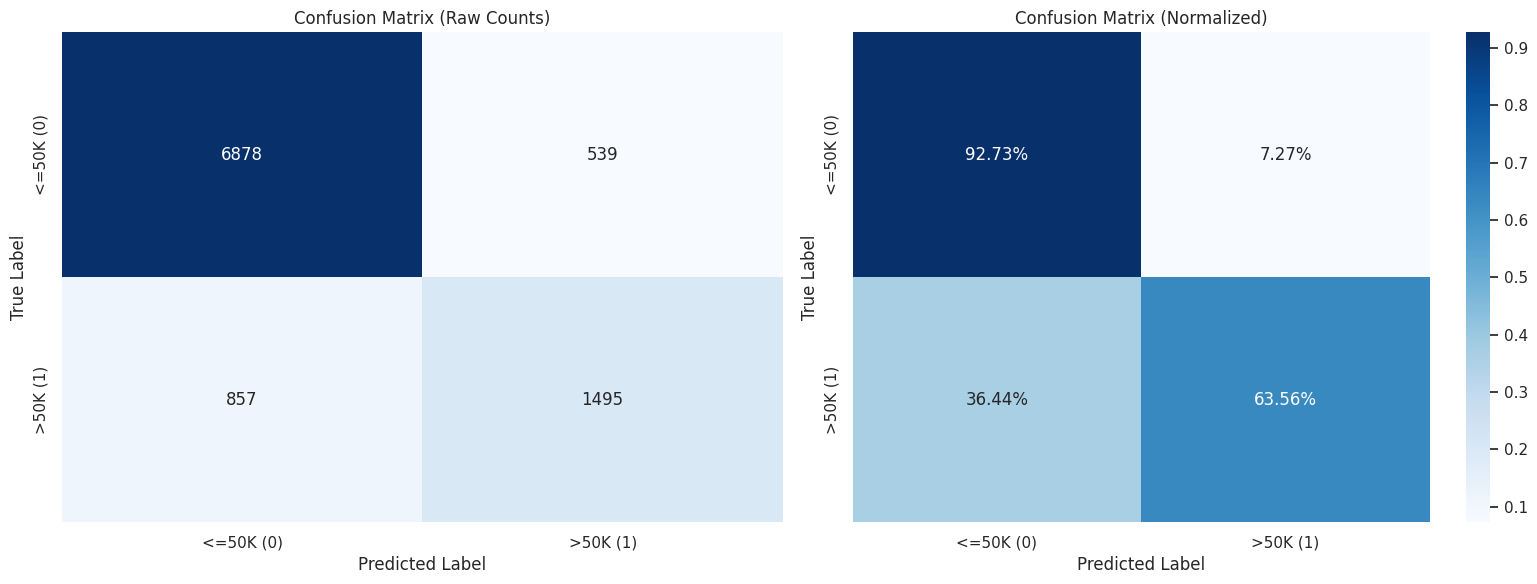

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

plt.figure(figsize=(16, 6))

# Raw counts confusion matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K (0)', '>50K (1)'],
            yticklabels=['<=50K (0)', '>50K (1)'],
            cbar=False)
plt.title('Confusion Matrix (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['<=50K (0)', '>50K (1)'],
            yticklabels=['<=50K (0)', '>50K (1)'])
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()



### **Group-wise Performance Evaluation**

In [84]:
# Split by gender
male_idx = X_test[X_test['sex'] == 0].index
female_idx = X_test[X_test['sex'] == 1].index

y_pred_male = model.predict(X_test.loc[male_idx].drop('sex', axis=1))
y_true_male = y_test.loc[male_idx]

y_pred_female = model.predict(X_test.loc[female_idx].drop('sex', axis=1))
y_true_female = y_test.loc[female_idx]

# fairness metrics
def calculate_fairness_metrics(y_true, y_pred, group_name):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # demographic parity
    metrics['positive_rate'] = (tp + fp) / (tp + fp + tn + fn)

    # equal opportunity
    metrics['tpr'] = tp / (tp + fn)

    metrics['fpr'] = fp / (fp + tn)

    metrics['fnr'] = fn / (fn + tp)

    return metrics

In [85]:
# metrics for both groups
male_metrics = calculate_fairness_metrics(y_true_male, y_pred_male, "Male")
female_metrics = calculate_fairness_metrics(y_true_female, y_pred_female, "Female")

print("\nMale Group Metrics:")
print(f"Accuracy: {male_metrics['accuracy']:.4f}")
print(f"Positive Rate: {male_metrics['positive_rate']:.4f}")
print(f"True Positive Rate: {male_metrics['tpr']:.4f}")
print(f"False Positive Rate: {male_metrics['fpr']:.4f}")

print("\nFemale Group Metrics:")
print(f"Accuracy: {female_metrics['accuracy']:.4f}")
print(f"Positive Rate: {female_metrics['positive_rate']:.4f}")
print(f"True Positive Rate: {female_metrics['tpr']:.4f}")
print(f"False Positive Rate: {female_metrics['fpr']:.4f}")


Male Group Metrics:
Accuracy: 0.8221
Positive Rate: 0.2644
True Positive Rate: 0.6424
False Positive Rate: 0.0997

Female Group Metrics:
Accuracy: 0.9290
Positive Rate: 0.0928
True Positive Rate: 0.5978
False Positive Rate: 0.0292


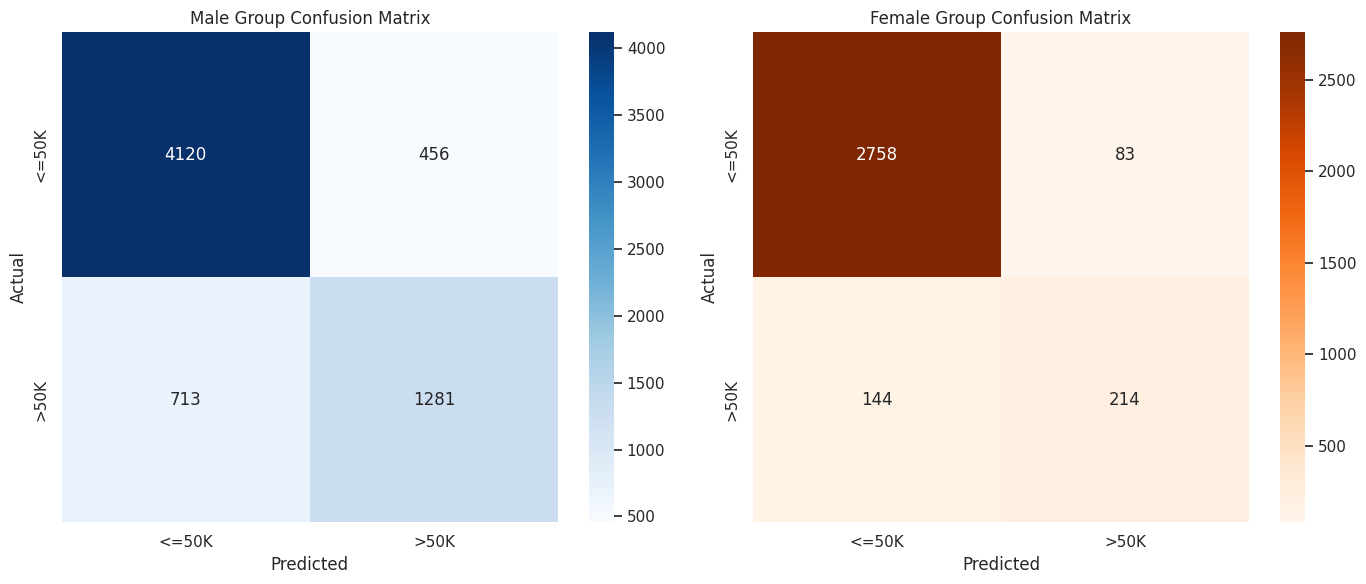

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test.drop('sex', axis=1))


male_mask = X_test['sex'] == 0
female_mask = X_test['sex'] == 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Male confusion matrix
male_cm = confusion_matrix(y_test[male_mask], y_pred[male_mask])
sns.heatmap(male_cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
ax1.set_title('Male Group Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Female confusion matrix
female_cm = confusion_matrix(y_test[female_mask], y_pred[female_mask])
sns.heatmap(female_cm, annot=True, fmt='d', cmap='Oranges', ax=ax2,
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
ax2.set_title('Female Group Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [91]:
def evaluate_fairness(model, X_test, y_test):
    # Split test set by gender
    male_idx = X_test[X_test['sex'] == 0].index
    female_idx = X_test[X_test['sex'] == 1].index

    # feature sets
    X_test_male = X_test.loc[male_idx].drop('sex', axis=1)
    X_test_female = X_test.loc[female_idx].drop('sex', axis=1)

    # Get predictions
    y_pred_male = model.predict(X_test_male)
    y_pred_female = model.predict(X_test_female)

    # Get true labels
    y_true_male = y_test.loc[male_idx]
    y_true_female = y_test.loc[female_idx]

    # Calculate metrics
    def calculate_metrics(y_true, y_pred):
        metrics = {}
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        metrics['positive_rate'] = (tp + fp) / len(y_pred)
        metrics['tpr'] = tp / (tp + fn) if (tp + fn) > 0 else 0
        metrics['fpr'] = fp / (fp + tn) if (fp + tn) > 0 else 0
        metrics['fnr'] = fn / (fn + tp) if (fn + tp) > 0 else 0
        metrics['precision'] = tp / (tp + fp) if (tp + fp) > 0 else 0

        return metrics

    male_metrics = calculate_metrics(y_true_male, y_pred_male)
    female_metrics = calculate_metrics(y_true_female, y_pred_female)

    # differences
    results = {
        'male_metrics': male_metrics,
        'female_metrics': female_metrics,
        'differences': {
            'accuracy': abs(male_metrics['accuracy'] - female_metrics['accuracy']),
            'positive_rate': abs(male_metrics['positive_rate'] - female_metrics['positive_rate']),
            'tpr': abs(male_metrics['tpr'] - female_metrics['tpr']),
            'fpr': abs(male_metrics['fpr'] - female_metrics['fpr'])
        }
    }

    return results

fairness_results = evaluate_fairness(model, X_test, y_test)

print("\nFairness Evaluation Results:")
print("\nMale Metrics:")
for metric, value in fairness_results['male_metrics'].items():
    print(f"{metric:>15}: {value:.4f}")

print("\nFemale Metrics:")
for metric, value in fairness_results['female_metrics'].items():
    print(f"{metric:>15}: {value:.4f}")

print("\nFairness Differences:")
for metric, diff in fairness_results['differences'].items():
    print(f"{metric:>15}: {diff:.4f}")


Fairness Evaluation Results:

Male Metrics:
       accuracy: 0.8221
  positive_rate: 0.2644
            tpr: 0.6424
            fpr: 0.0997
            fnr: 0.3576
      precision: 0.7375

Female Metrics:
       accuracy: 0.9290
  positive_rate: 0.0928
            tpr: 0.5978
            fpr: 0.0292
            fnr: 0.4022
      precision: 0.7205

Fairness Differences:
       accuracy: 0.1070
  positive_rate: 0.1715
            tpr: 0.0447
            fpr: 0.0704


### **Fairness Criteria Evaluation**

**A. Equal Accuracy**

In [87]:
accuracy_diff = abs(male_metrics['accuracy'] - female_metrics['accuracy'])
print(f"\nEqual Accuracy Evaluation:")
print(f"Male Accuracy: {male_metrics['accuracy']:.4f}")
print(f"Female Accuracy: {female_metrics['accuracy']:.4f}")
print(f"Absolute Difference: {accuracy_diff:.4f}")

if accuracy_diff < 0.05:
    print("Conclusion: Model satisfies equal accuracy (difference < 5%)")
else:
    print("Conclusion: Model shows bias in accuracy across groups")


Equal Accuracy Evaluation:
Male Accuracy: 0.8221
Female Accuracy: 0.9290
Absolute Difference: 0.1070
Conclusion: Model shows bias in accuracy across groups


**B. Demographic Parity**

In [88]:
dp_diff = abs(male_metrics['positive_rate'] - female_metrics['positive_rate'])
print(f"\nDemographic Parity Evaluation:")
print(f"Male Positive Rate: {male_metrics['positive_rate']:.4f}")
print(f"Female Positive Rate: {female_metrics['positive_rate']:.4f}")
print(f"Absolute Difference: {dp_diff:.4f}")

if dp_diff < 0.05:
    print("Conclusion: Model satisfies demographic parity (difference < 5%)")
else:
    print("Conclusion: Model shows bias in positive prediction rates")


Demographic Parity Evaluation:
Male Positive Rate: 0.2644
Female Positive Rate: 0.0928
Absolute Difference: 0.1715
Conclusion: Model shows bias in positive prediction rates


**C. Equal Opportunity**

In [ ]:
eo_diff = abs(male_metrics['tpr'] - female_metrics['tpr'])
print(f"\nEqual Opportunity Evaluation:")
print(f"Male True Positive Rate: {male_metrics['tpr']:.4f}")
print(f"Female True Positive Rate: {female_metrics['tpr']:.4f}")
print(f"Absolute Difference: {eo_diff:.4f}")

if eo_diff < 0.05:
    print("Conclusion: Model satisfies equal opportunity (difference < 5%)")
else:
    print("Conclusion: Model shows bias in true positive rates")